In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa
import librosa.display
import warnings
from IPython.display import Audio
import sys
from IPython.display import Audio
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

print("Done")

Done


### Part 1: Define Base Path

In [22]:
Ravdess = "./datasets/ravdess/"
print("base path set.")

base path set.


### Part 2: Extract File Paths and Emotion Codes

In [23]:
file_emotion = []
file_path = []

ravdess_directory_list = os.listdir(Ravdess)

for dir_name in ravdess_directory_list:
    actor_path = os.path.join(Ravdess, dir_name)
    
    if os.path.isdir(actor_path):
        
        actor_files = os.listdir(actor_path)
        
        for file in actor_files:
            if file.endswith('.wav'):
                parts = file.split('.')[0].split('-')
                
                if len(parts) > 2:
                    emotion_code = int(parts[2])
                    file_emotion.append(emotion_code)
                    file_path.append(os.path.join(actor_path, file))

print(f"Part 2: Found {len(file_path)} files and their corresponding emotions.")

Part 2: Found 1440 files and their corresponding emotions.


### Part 3: Create and Organize the DataFrame

In [24]:
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
Ravdess_df.Emotions.replace({
    1:'neutral', 2:'calm', 3:'happy', 4:'sad', 
    5:'angry', 6:'fear', 7:'disgust', 8:'surprise'
}, inplace=True)

print("\nPart 3: DataFrame created successfully.")
print(Ravdess_df.head(10))


Part 3: DataFrame created successfully.
  Emotions                                               Path
0  neutral  ./datasets/ravdess/Actor_01\03-01-01-01-01-01-...
1  neutral  ./datasets/ravdess/Actor_01\03-01-01-01-01-02-...
2  neutral  ./datasets/ravdess/Actor_01\03-01-01-01-02-01-...
3  neutral  ./datasets/ravdess/Actor_01\03-01-01-01-02-02-...
4     calm  ./datasets/ravdess/Actor_01\03-01-02-01-01-01-...
5     calm  ./datasets/ravdess/Actor_01\03-01-02-01-01-02-...
6     calm  ./datasets/ravdess/Actor_01\03-01-02-01-02-01-...
7     calm  ./datasets/ravdess/Actor_01\03-01-02-01-02-02-...
8     calm  ./datasets/ravdess/Actor_01\03-01-02-02-01-01-...
9     calm  ./datasets/ravdess/Actor_01\03-01-02-02-01-02-...


### Part 4: Data Visualisation and Exploration¶

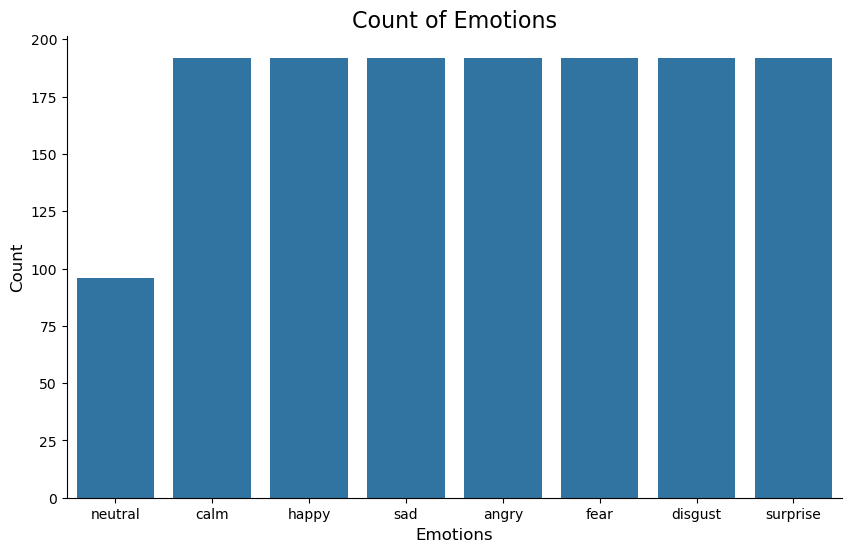

In [25]:
plt.figure(figsize=(10, 6)) 
plt.title('Count of Emotions', size=16)

sns.countplot(x="Emotions", data=Ravdess_df)

plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

### Part 5: Define Feature Extraction Function

In [26]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with "{e}" emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

def create_spectrogram(data, sr, e):
    # Short-time Fourier transform (STFT)
    X = librosa.stft(data)
    # Convert to decibels for better visualization
    Xdb = librosa.amplitude_to_db(np.abs(X))
    plt.figure(figsize=(12, 3))
    plt.title(f'Spectrogram for audio with "{e}" emotion', size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

### Part 6: Visualize a Specific Emotion

--- Visualizing and playing audio for 'neutral' emotion ---


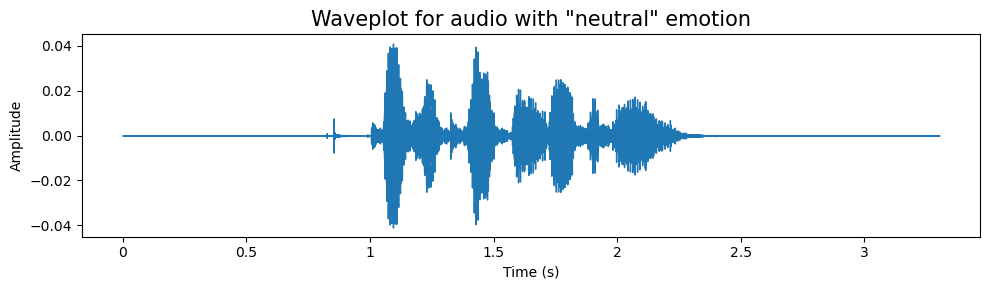

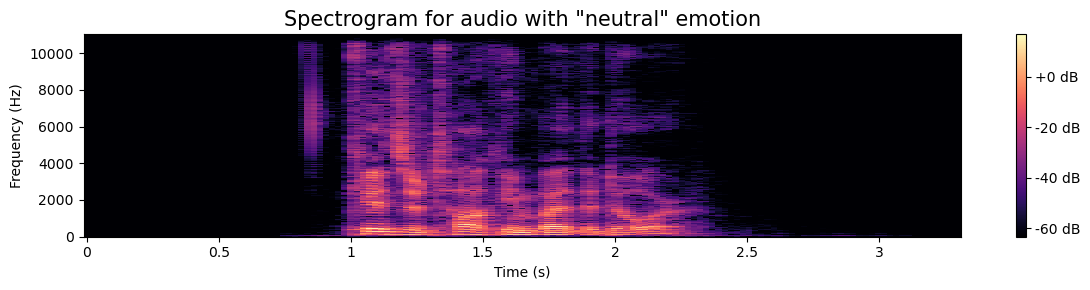

--- Visualizing and playing audio for 'calm' emotion ---


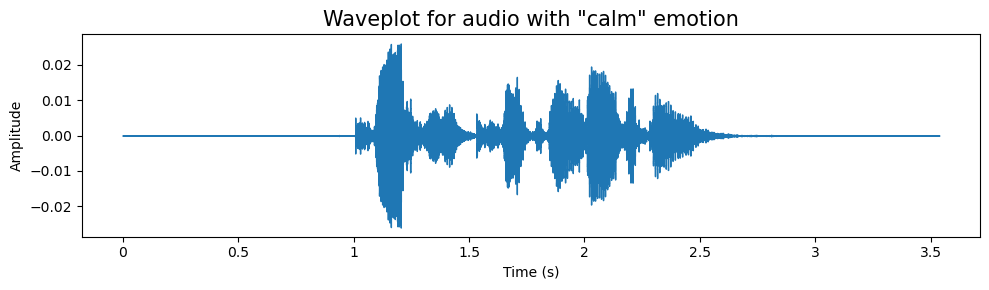

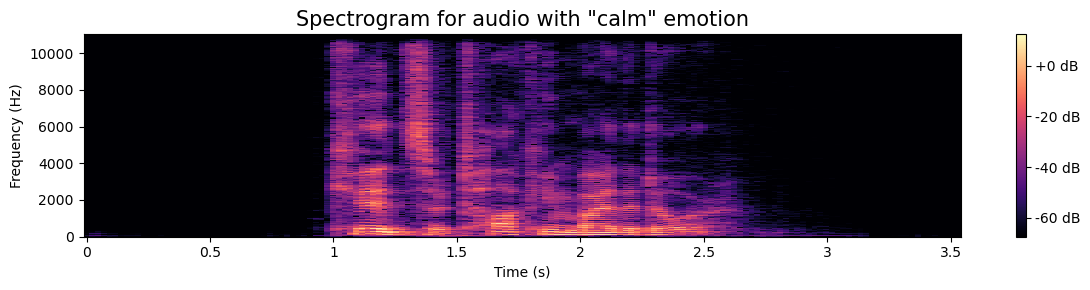

--- Visualizing and playing audio for 'happy' emotion ---


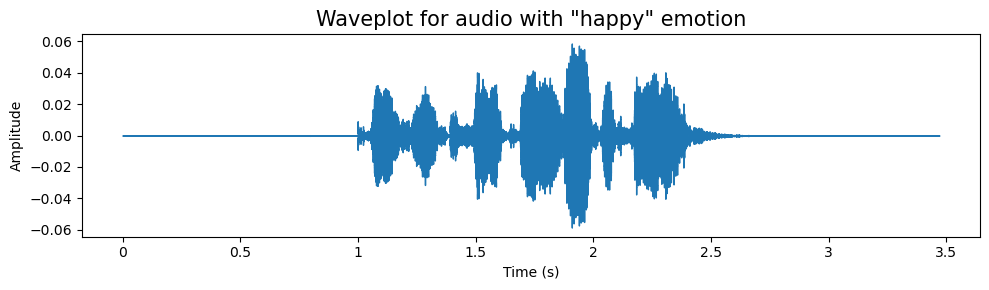

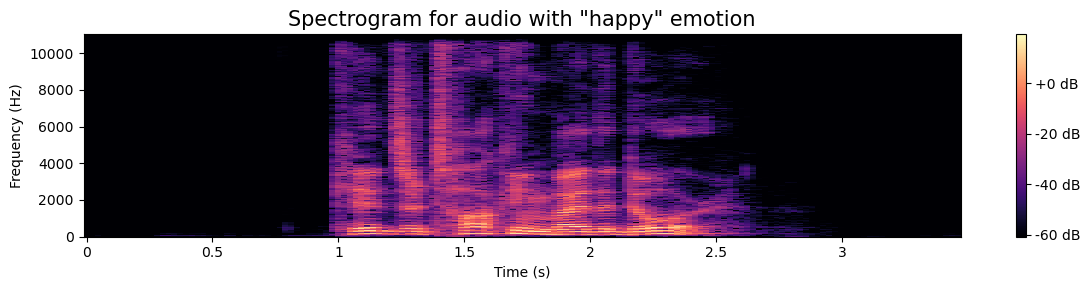

--- Visualizing and playing audio for 'sad' emotion ---


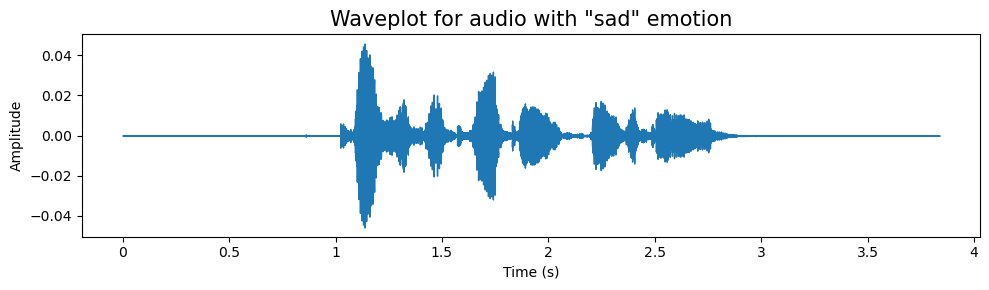

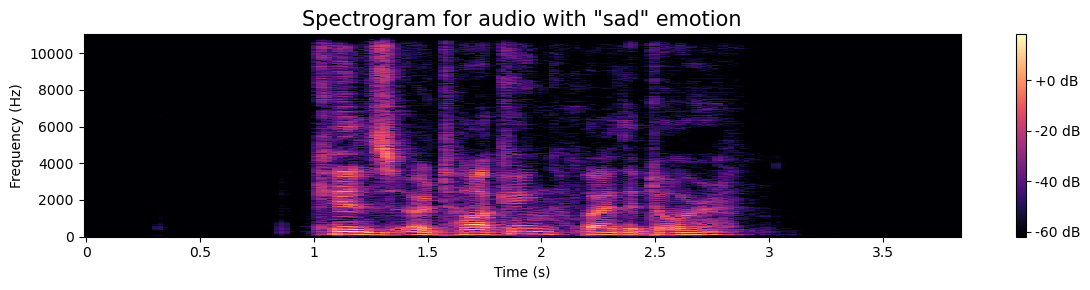

--- Visualizing and playing audio for 'angry' emotion ---


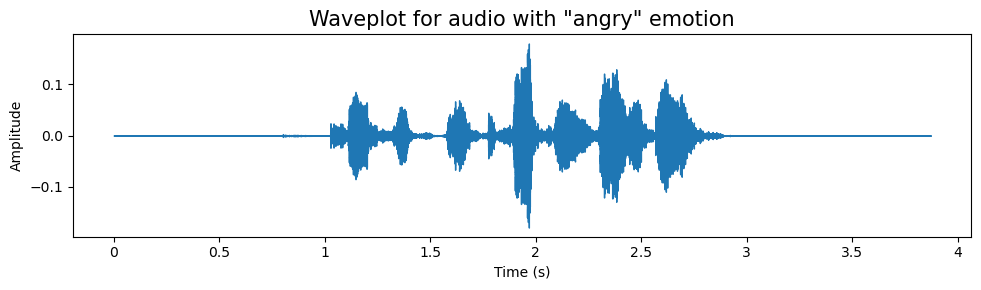

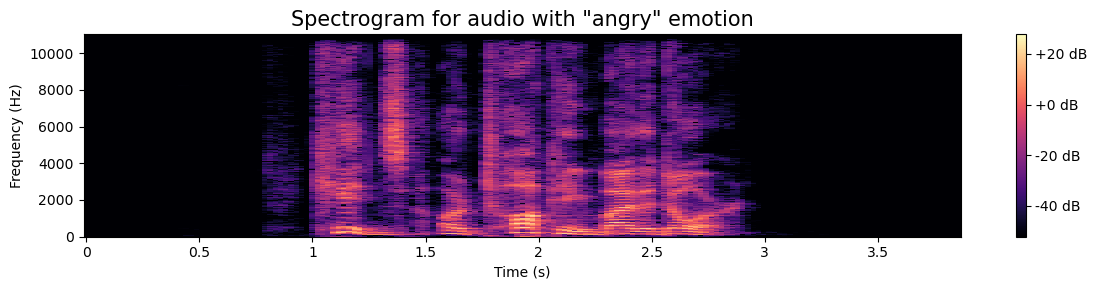

--- Visualizing and playing audio for 'fear' emotion ---


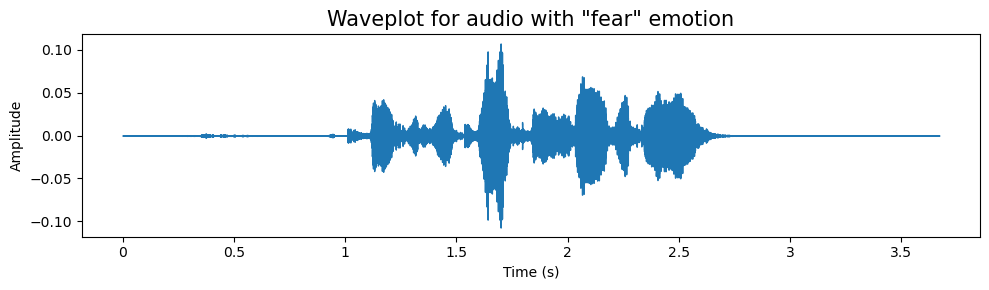

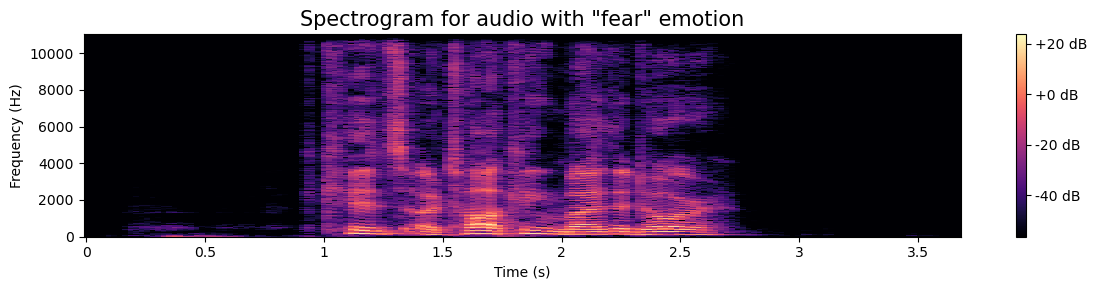

--- Visualizing and playing audio for 'disgust' emotion ---


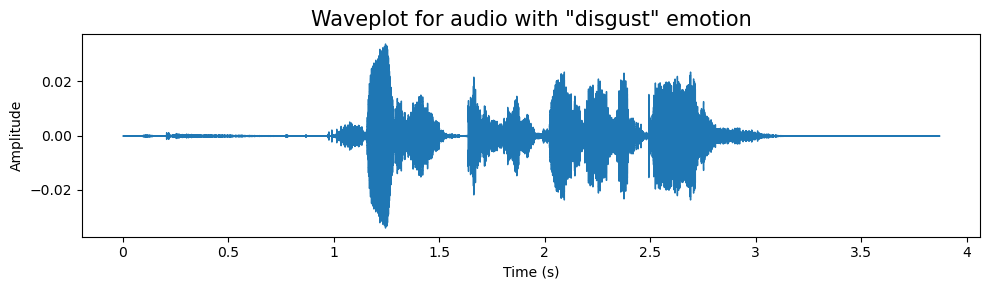

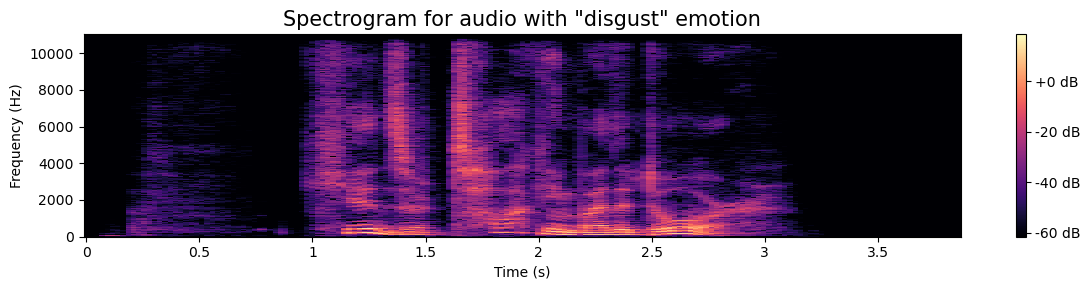

--- Visualizing and playing audio for 'surprise' emotion ---


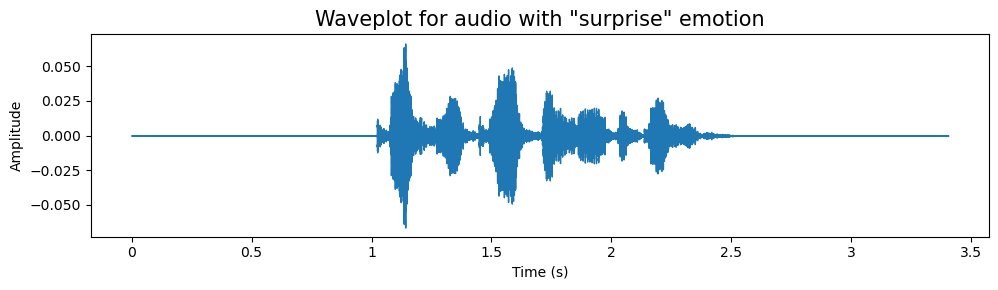

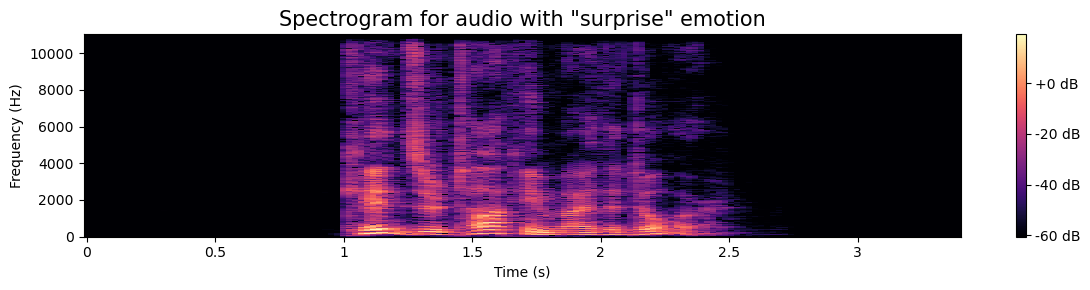

In [27]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with "{e}" emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(np.abs(X))
    plt.figure(figsize=(12, 3))
    plt.title(f'Spectrogram for audio with "{e}" emotion', size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

unique_emotions = Ravdess_df['Emotions'].unique()

for emotion in unique_emotions:
    print(f"--- Visualizing and playing audio for '{emotion}' emotion ---")
    paths_for_emotion = Ravdess_df[Ravdess_df['Emotions'] == emotion]['Path'].values
    path = paths_for_emotion[0]
    data, sampling_rate = librosa.load(path)
    create_waveplot(data, sampling_rate, emotion)
    create_spectrogram(data, sampling_rate, emotion)
    display(Audio(path))

### Part 7: Define Data Augmentation Functions

In [28]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * data.max()
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sr, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sr, n_steps=pitch_factor)

### Part 8: Test the Augmentation Functions

In [29]:
path = np.array(Ravdess_df.Path)[1]

data, sample_rate = librosa.load(path, sr=None)

print(f"File loaded from: {path}")
print(f"Audio data shape: {data.shape}")
print(f"Sample rate: {sample_rate} Hz")

File loaded from: ./datasets/ravdess/Actor_01\03-01-01-01-01-02-01.wav
Audio data shape: (160160,)
Sample rate: 48000 Hz


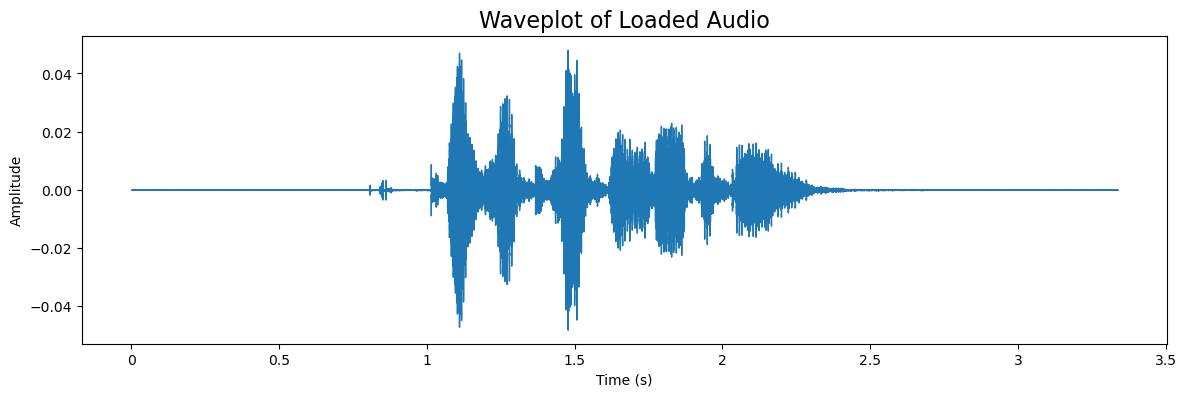

In [30]:
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
plt.title('Waveplot of Loaded Audio', size=16)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Audio(path)

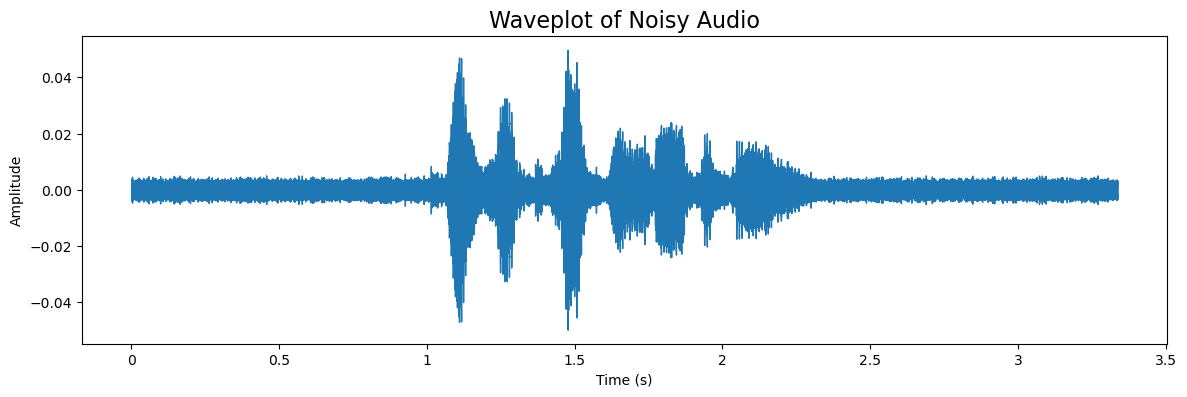

In [31]:
x = noise(data)

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Waveplot of Noisy Audio', size=16)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Audio(x, rate=sample_rate)

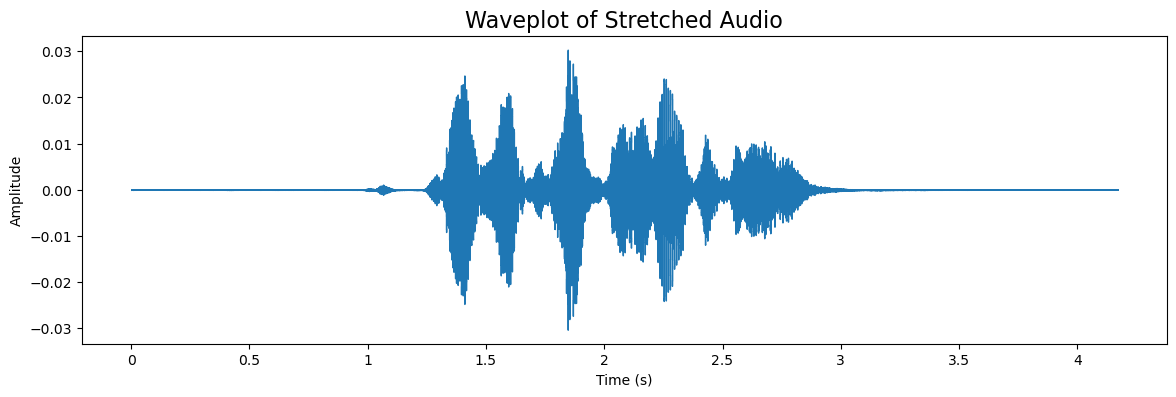

In [32]:
x = stretch(data)

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Waveplot of Stretched Audio', size=16)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Audio(x, rate=sample_rate)

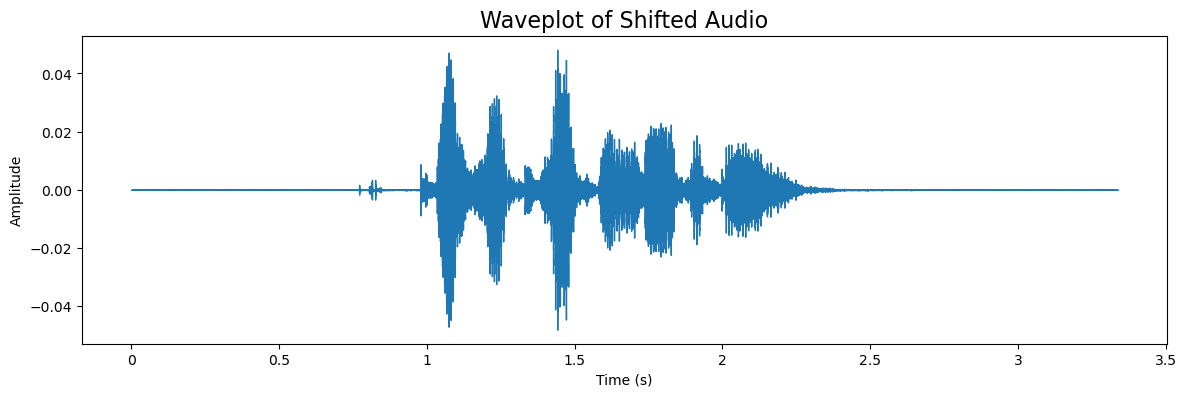

In [33]:
x = shift(data)

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Waveplot of Shifted Audio', size=16)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Audio(x, rate=sample_rate)

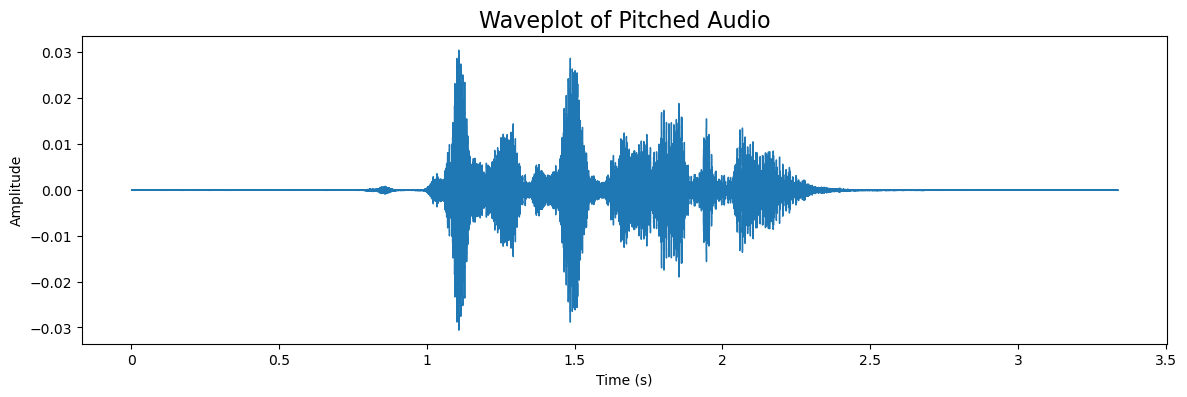

In [34]:
x = pitch(data, sample_rate)

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=sample_rate)
plt.title('Waveplot of Pitched Audio', size=16)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Audio(x, rate=sample_rate)

### 8: Modeling 